In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'data/Copy of Instagram_Analytics - DO NOT DELETE (for interview purposes).xlsx'

In [3]:
# Use openpyxl engine to read .xlsx files
excel_data = pd.ExcelFile(file_path, engine='openpyxl')

In [4]:
# Print sheet names
print(excel_data.sheet_names)

['Instagram Profile Overview', 'Instagram Post Engagement', 'Instagram Age Gender Demographi', 'Instagram Top Cities Regions', 'SupermetricsQueries']


In [5]:
# Load the correct sheet
df = pd.read_excel(file_path, sheet_name='Instagram Post Engagement', engine='openpyxl')

In [6]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                61 non-null     datetime64[ns]
 1   Media ID            61 non-null     int64         
 2   Media caption       61 non-null     object        
 3   Media product type  61 non-null     object        
 4   Media impressions   61 non-null     int64         
 5   Media reach         61 non-null     int64         
 6   Like count          61 non-null     int64         
 7   Comments count      61 non-null     int64         
 8   Shares              61 non-null     int64         
 9   Unique saves        61 non-null     int64         
 10  Video views         61 non-null     int64         
 11  RowHash             61 non-null     object        
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 5.8+ KB


In [9]:
# Clean Data
df.fillna(0, inplace=True)  # Handle missing values

In [12]:
# Calculate engagement rate: (likes + comments + shares) / reach
df['Engagement Rate'] = (df['Like count'] + df['Comments count'] + df['Shares']) / df['Media reach']
df['Engagement Rate'] = df['Engagement Rate'].replace([float('inf'), -float('inf')], 0)

In [14]:
# Print first few engagement rates
print(df[['Media caption', 'Engagement Rate']].head())

                                       Media caption  Engagement Rate
0  Comment ‘CLASS’ to sign up to my free mastercl...         0.023342
1  Comment ‘CLASS’ to sign up to my free mastercl...         0.014388
2  Comment ‘CLASS’ to sign up to my free mastercl...         0.022809
3  Comment ‘CLASS’ to sign up to my free mastercl...         0.032031
4  Comment ‘CLASS’ to sign up to my free mastercl...         0.019920


In [13]:
# Average engagement rate
avg_rate = df['Engagement Rate'].mean()
print(f"Average Engagement Rate: {avg_rate:.2f}")

Average Engagement Rate: 0.04


In [15]:
# Add total engagement
df['Total Engagement'] = df['Like count'] + df['Comments count'] + df['Shares']

In [16]:
# Top-performing post
top_post = df.loc[df['Total Engagement'].idxmax()]
print("\nTop-performing Post:")
print(top_post[['Date', 'Media caption', 'Total Engagement', 'Engagement Rate']])


Top-performing Post:
Date                                              2024-11-16 00:00:00
Media caption       8 reminders you need to hear today as a divorc...
Total Engagement                                                  470
Engagement Rate                                              0.058291
Name: 28, dtype: object


In [17]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
# Sort by Date
df.sort_values('Date', inplace=True)

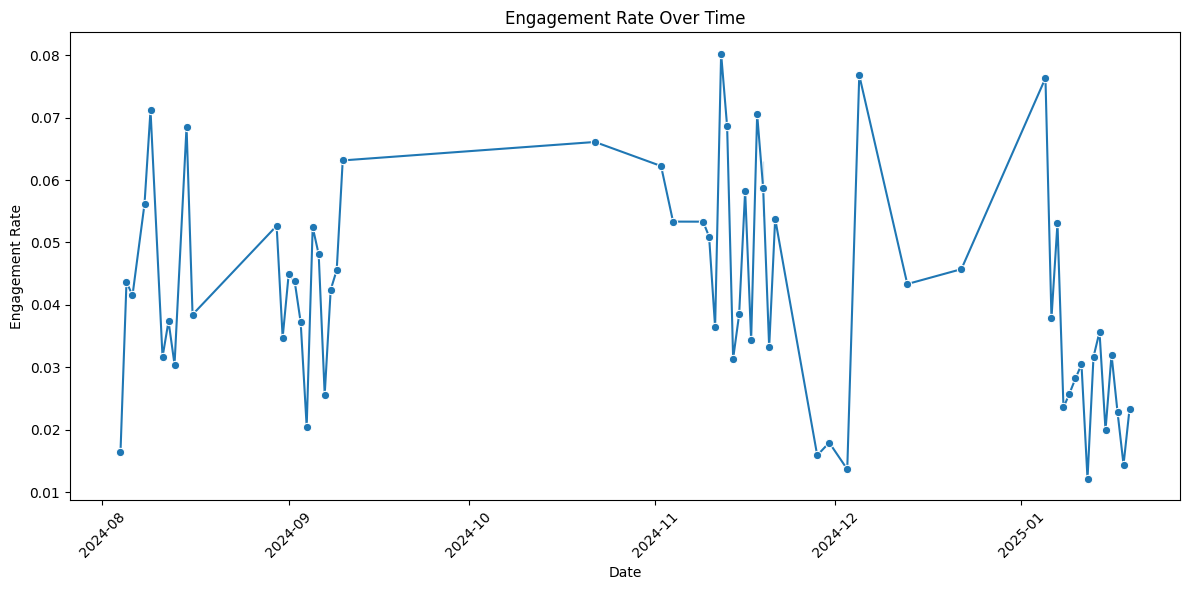

In [19]:
# Line chart: Engagement Rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Engagement Rate', marker='o')
plt.title('Engagement Rate Over Time')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

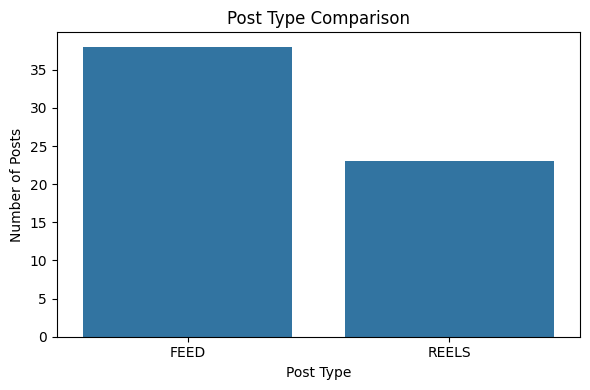

In [20]:
# Bar chart: Reels vs Static Posts (FEED)
post_types = df['Media product type'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=post_types.index, y=post_types.values)
plt.title('Post Type Comparison')
plt.ylabel('Number of Posts')
plt.xlabel('Post Type')
plt.tight_layout()
plt.show()

In [21]:
#Simple threshold model to predict good performance
def predict_performance(row, threshold=0.05):
    return 'High' if row['Engagement Rate'] >= threshold else 'Low'


In [22]:
df['Performance Prediction'] = df.apply(predict_performance, axis=1)

In [23]:
# Show sample predictions
print("\nPerformance Prediction Sample:")
print(df[['Date', 'Engagement Rate', 'Performance Prediction']].head())


Performance Prediction Sample:
         Date  Engagement Rate Performance Prediction
60 2024-08-04         0.016371                    Low
59 2024-08-05         0.043664                    Low
58 2024-08-06         0.041525                    Low
57 2024-08-08         0.056164                   High
56 2024-08-09         0.071204                   High
